In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

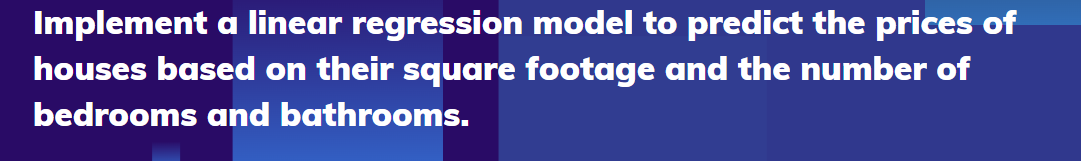

As in our task it is mentioned that we have to  predict the price based on the square footage and number of bedrooms and bathrooms I am going to take the relevant columns only

In [4]:
df=df[["LotFrontage","LotArea","GrLivArea",'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','SalePrice' ]]

In [5]:
df.head()

,LotFrontage,LotArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice
0,65.0,8450,1710,1,0,2,1,3,1,208500
1,80.0,9600,1262,0,1,2,0,3,1,181500
2,68.0,11250,1786,1,0,2,1,3,1,223500
3,60.0,9550,1717,1,0,1,0,3,1,140000
4,84.0,14260,2198,1,0,2,1,4,1,250000


In [6]:
df.shape

(1460, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   BsmtFullBath  1460 non-null   int64  
 4   BsmtHalfBath  1460 non-null   int64  
 5   FullBath      1460 non-null   int64  
 6   HalfBath      1460 non-null   int64  
 7   BedroomAbvGr  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [8]:
df.isnull().sum()

LotFrontage     259
LotArea           0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
SalePrice         0
dtype: int64

In [9]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True)

### outliers

In [10]:
df.describe()

,LotFrontage,LotArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,180921.195890
std,22.024023,9981.264932,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,79442.502883
min,21.000000,1300.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,129975.000000
50%,70.049958,9478.500000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,163000.000000
75%,79.000000,11601.500000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,214000.000000
max,313.000000,215245.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,755000.000000


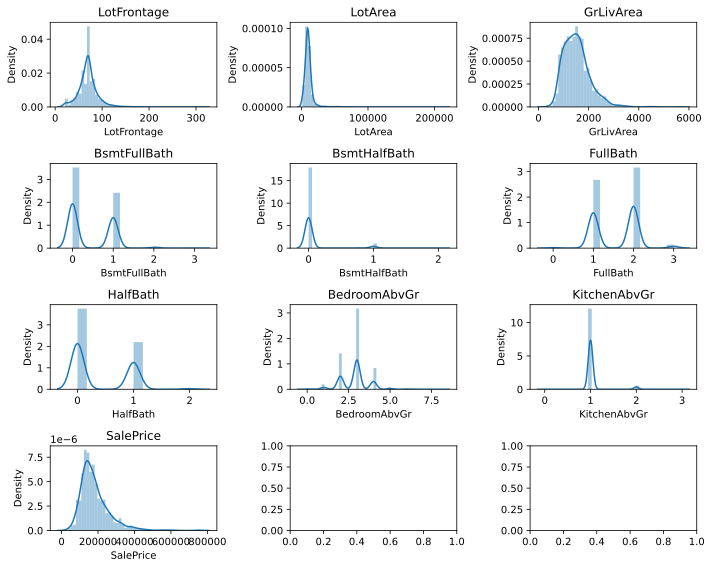

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = df.columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column's distribution
for i, col in enumerate(columns):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
skewness = df.skew()

# Print skewness of each column
print("Skewness of each column:")
print(skewness)

Skewness of each column:
LotFrontage      2.384950
LotArea         12.207688
GrLivArea        1.366560
BsmtFullBath     0.596067
BsmtHalfBath     4.103403
FullBath         0.036562
HalfBath         0.675897
BedroomAbvGr     0.211790
KitchenAbvGr     4.488397
SalePrice        1.882876
dtype: float64


## Data Transformation Steps

### 1. Skewness Assessment

First, I assessed the skewness of each numerical column in my dataset:

- **LotArea**: Skewness = 12.207688
- **GrLivArea**: Skewness = 1.366560
- **BsmtFullBath**: Skewness = 0.596067
- **BsmtHalfBath**: Skewness = 4.103403
- **KitchenAbvGr**: Skewness = 4.488397
- **SalePrice**: Skewness = 1.882876

### 2. Transformation Selection

Based on the skewness values, I decided to apply transformations to columns with skewness greater than 1. Here are the transformations chosen:

- **LotArea**: Applied a log transformation.
- **GrLivArea**: Applied a llog transformation.
- **KitchenAbvGr**: Applied a log transformation.
- **SalePrice**: Applied a  df[column] = np.log1p(df[column])


In [13]:
import numpy as np
import pandas as pd

columns_to_transform = ['LotArea', 'GrLivArea', 'KitchenAbvGr', 'SalePrice']

for column in columns_to_transform:
    df[column] = np.log1p(df[column])


df.head()


,LotFrontage,LotArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice
0,65.0,9.042040,7.444833,1,0,2,1,3,0.693147,12.247699
1,80.0,9.169623,7.141245,0,1,2,0,3,0.693147,12.109016
2,68.0,9.328212,7.488294,1,0,2,1,3,0.693147,12.317171
3,60.0,9.164401,7.448916,1,0,1,0,3,0.693147,11.849405
4,84.0,9.565284,7.695758,1,0,2,1,4,0.693147,12.429220


In [14]:
df.describe()

,LotFrontage,LotArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,9.110966,7.268512,0.425342,0.057534,1.565068,0.382877,2.866438,0.711673,12.024057
std,22.024023,0.517369,0.333303,0.518911,0.238753,0.550916,0.502885,0.815778,0.089268,0.399449
min,21.000000,7.170888,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,60.000000,8.929898,7.030415,0.000000,0.000000,1.000000,0.000000,2.000000,0.693147,11.775105
50%,70.049958,9.156887,7.289611,0.000000,0.000000,2.000000,0.000000,3.000000,0.693147,12.001512
75%,79.000000,9.358976,7.483104,1.000000,0.000000,2.000000,1.000000,3.000000,0.693147,12.273736
max,313.000000,12.279537,8.638171,3.000000,2.000000,3.000000,2.000000,8.000000,1.386294,13.534474


In [15]:
skewness = df.skew()

# Print skewness of each column
print("Skewness of each column:")
print(skewness)

Skewness of each column:
LotFrontage     2.384950
LotArea        -0.137404
GrLivArea      -0.006140
BsmtFullBath    0.596067
BsmtHalfBath    4.103403
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
KitchenAbvGr    3.869414
SalePrice       0.121347
dtype: float64


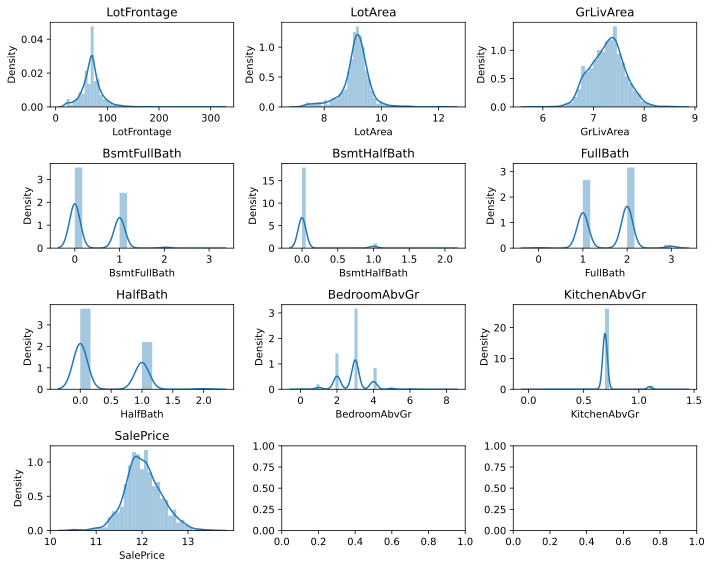

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = df.columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column's distribution
for i, col in enumerate(columns):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['LotFrontage', 'LotArea', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice'],
      dtype='object')

In [18]:
print("Highest allowed",df['LotArea'].mean() + 3*df['LotArea'].std())
print("Lowest allowed",df['LotArea'].mean() - 3*df['LotArea'].std())

Highest allowed 10.663073362897379
Lowest allowed 7.558859284980944


In [19]:
df = df[(df['LotArea'] < 10.646779062339654) & (df['LotArea'] > 7.561900576503221)]

In [20]:
print("Highest allowed",df['GrLivArea'].mean() + 3*df['GrLivArea'].std())
print("Lowest allowed",df['GrLivArea'].mean() - 3*df['GrLivArea'].std())

Highest allowed 8.25599322772575
Lowest allowed 6.284610907981852


In [21]:
df = df[(df['GrLivArea'] < 8.26020859612825) & (df['GrLivArea'] > 6.283719345973267)]

In [22]:
print("Highest allowed",df['FullBath'].mean() + 3*df['FullBath'].std())
print("Lowest allowed",df['FullBath'].mean() - 3*df['FullBath'].std())

Highest allowed 3.1976224150212342
Lowest allowed -0.060201696205166355


In [23]:
df = df[(df['FullBath'] < 3.1935075978505654) & (df['FullBath'] > -0.041901921973044765)]

In [24]:
print("Highest allowed",df['BedroomAbvGr'].mean() + 3*df['BedroomAbvGr'].std())
print("Lowest allowed",df['BedroomAbvGr'].mean() - 3*df['BedroomAbvGr'].std())

Highest allowed 5.285330845320926
Lowest allowed 0.4764732420645563


In [25]:
df = df[(df['BedroomAbvGr'] < 5.264449162159996) & (df['BedroomAbvGr'] > 0.4831236533739851)]

In [26]:
print("Highest allowed",df['SalePrice'].mean() + 3*df['SalePrice'].std())
print("Lowest allowed",df['SalePrice'].mean() - 3*df['SalePrice'].std())

Highest allowed 13.187389198688766
Lowest allowed 10.870519182420121


In [27]:
df = df[(df['SalePrice'] < 13.207468207052063) & (df['SalePrice'] > 10.85387837648943)]

In [28]:
df.describe()

,LotFrontage,LotArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice
count,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.00000,1398.000000,1398.000000
mean,70.443841,9.113042,7.268162,0.415594,0.055794,1.568670,0.376252,2.87196,0.709885,12.027688
std,20.172968,0.430198,0.315956,0.508721,0.235758,0.534365,0.499170,0.74149,0.085683,0.373546
min,21.000000,7.568896,6.406880,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,10.859018
25%,60.000000,8.944256,7.034608,0.000000,0.000000,1.000000,0.000000,2.00000,0.693147,11.782960
50%,70.049958,9.158731,7.289611,0.000000,0.000000,2.000000,0.000000,3.00000,0.693147,12.007628
75%,79.000000,9.349711,7.479441,1.000000,0.000000,2.000000,1.000000,3.00000,0.693147,12.271069
max,313.000000,10.574006,8.191186,3.000000,2.000000,3.000000,2.000000,5.00000,1.386294,13.126033


In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [30]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [32]:
df.shape

(1398, 10)

In [38]:
# StandardScaler
scaler = StandardScaler(copy=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.score(X_train, y_train)

0.7123640368784456

In [41]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.03566350539515936
R^2 Score: 0.7495504131131128


But I am getting a good accuracy for DT

In [42]:
from sklearn import tree

modelt = tree.DecisionTreeRegressor()

modelt.fit(X_train, y_train)


DecisionTreeRegressor()

In [43]:
modelt.score(X_train, y_train)

0.9998596297980877

In [48]:
y_predt = modelt.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.03566350539515936
R^2 Score: 0.7495504131131128


In [44]:
import pickle

# Assuming 'model' is your trained machine learning model object

# Open a file named 'wine_model.pkl' in write-binary mode ('wb')
file = open('house_price_1.pkl', 'wb')

# Use pickle to dump (i.e., serialize) the 'model' object into the 'file'
pickle.dump(model, file)


In [45]:
import pickle

# Assuming 'model' is your trained machine learning model object

# Open a file named 'wine_model.pkl' in write-binary mode ('wb')
file = open('house_price_2.pkl', 'wb')

# Use pickle to dump (i.e., serialize) the 'model' object into the 'file'
pickle.dump(modelt, file)
